In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
#check missing value counts
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
#check percentage of missing glucose values as a percentage
round(df.isnull().sum()['glucose']/len(df)*100, 1)

9.2

In [5]:
x = df['glucose'].dropna()

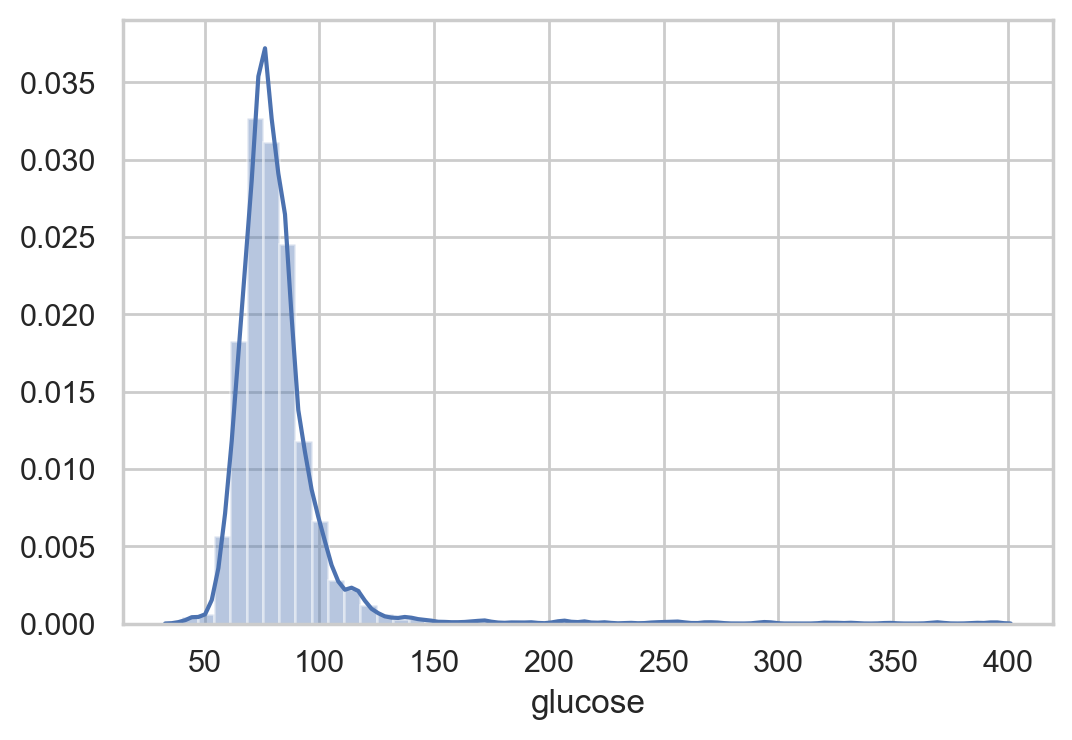

In [6]:
plt.figure(dpi=200)
sns.distplot(x)

In [7]:
#Lets
print('Mean is', round(df['glucose'].mean(), 1))
print('Mode is',np.array(df['glucose'].mode())[0])

Mean is 82.0
Mode is 75.0


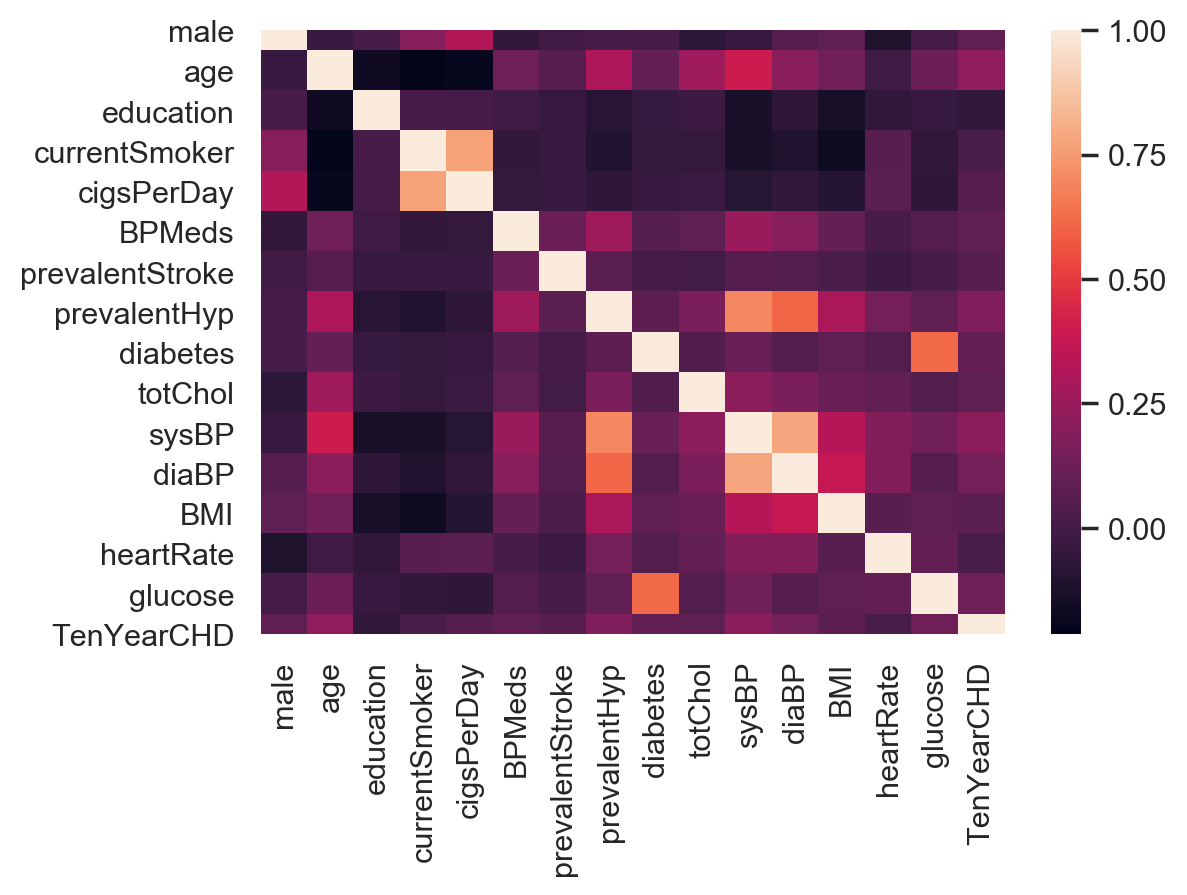

In [8]:
#search for correlation of glucose with other variables
plt.figure(dpi=200)
sns.heatmap(df.corr())

In [9]:
#diabetes seems to be high from heatmap, let's see real values. 
#It is quite a lot
df[['glucose', 'diabetes']].corr()

,glucose,diabetes
glucose,1.000000,0.617627
diabetes,0.617627,1.000000


In [10]:
#Let's see dataframe where glucose values are null 
#And count of absent diabetes
df1 = df.loc[df['glucose'].isnull()]
print('Diabetes is 0, count =',len(df1[df1['diabetes']==0]))
print('Diabetes is 1, count =',len(df1[df1['diabetes']==1]))

Diabetes is 0, count = 384
Diabetes is 1, count = 4


In [11]:
#lets plot distributions of glucose when diabetes = 1 and 0 
df2 = df[df['diabetes']==0].dropna()
df3 = df[df['diabetes']==1].dropna()

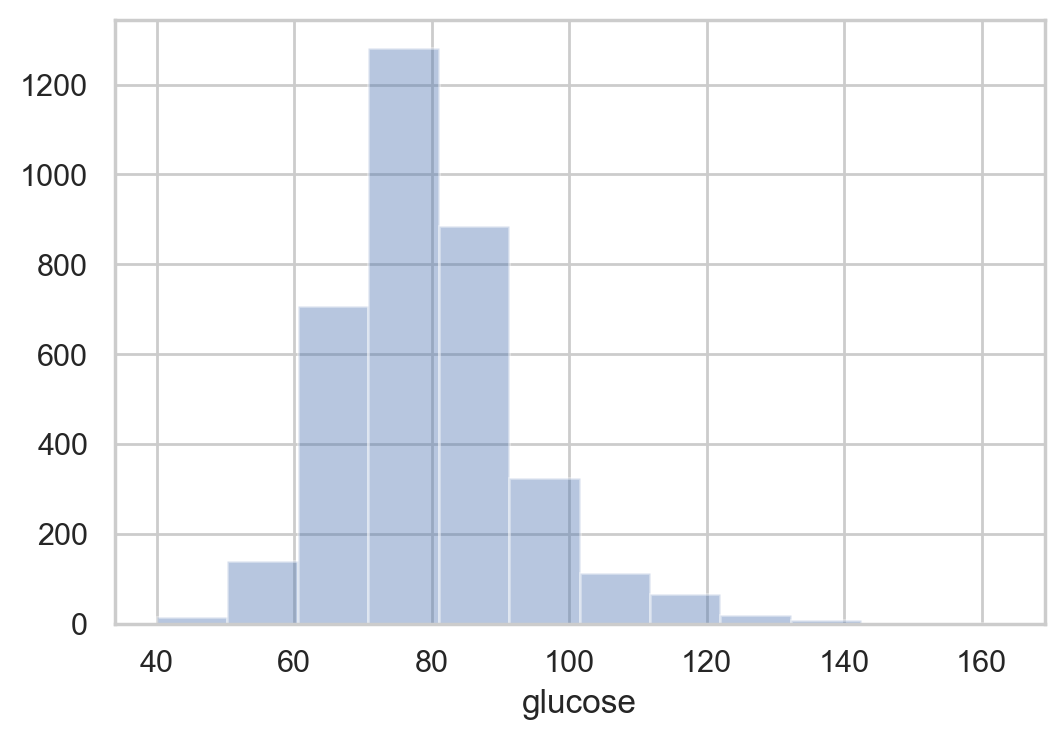

In [12]:
plt.figure(dpi=200)
sns.distplot(df2['glucose'], kde=False, bins=12)

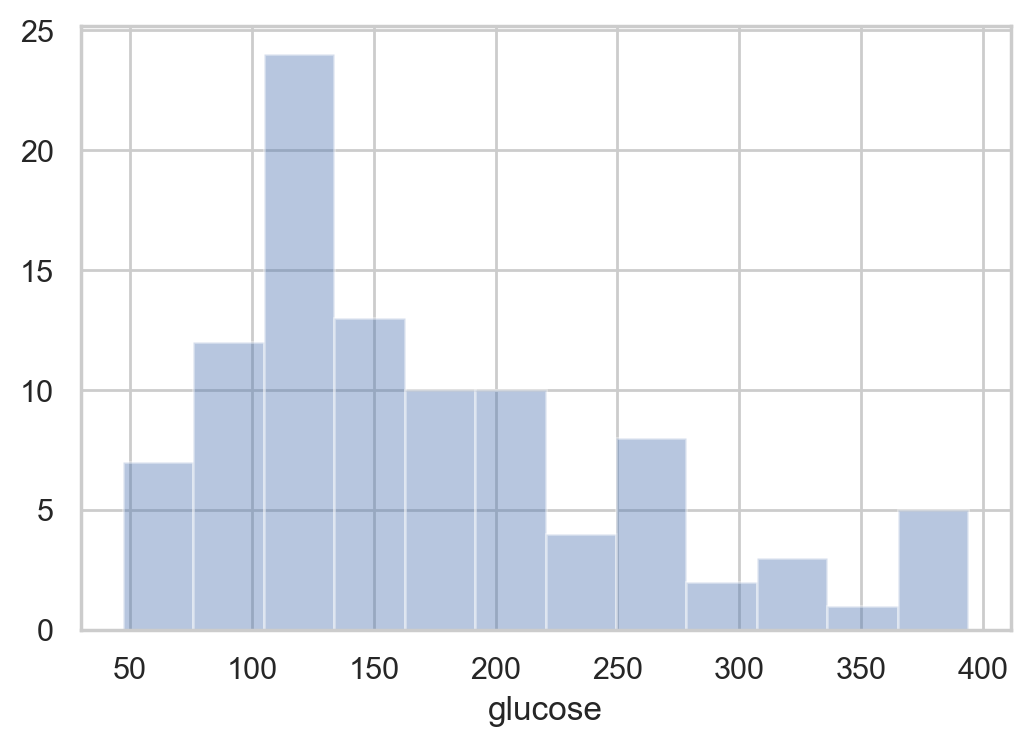

In [13]:
plt.figure(dpi=200)
sns.distplot(df3['glucose'], kde=False, bins=12)

In [14]:
#So, it is apparent that those who have diabetes have higher probability
# to have gher glucose levels
#Thus, it is quite reasonable to impute glucose with mean who does not have diabetes
#Those who have diabetes should be imputed with mean of those who have diabetes

In [15]:
# since in df3 glucose levels have a lot of outliers let's curb them with median
# for the df2 we will use mean as a convention
does_not_have = df2['glucose'].mean() #Glucose level mean who does not have diabetes
does_have = df3['glucose'].median() #Glucose level median who has diabetes

In [16]:
print('Glucose level mean   who does not have diabetes = ', round(does_not_have))
print('Glucose level median who has diabetes = ', round(does_have))

Glucose level mean   who does not have diabetes =  79
Glucose level median who has diabetes =  145


In [17]:
#lets create two dataframes with glucose not null and null
#remember, df1 was a dataframe with glucose null (so we already did it)
#at the end we will concatenate them
df_glucose_not_null = df[-df['glucose'].isnull()]

In [18]:
#Divide dataframes with diabetes =1  and diabetes =0 (where glucose is Null)
#Then impute corresponding values
df5 = df1[df1['diabetes']==1]
df5['glucose'].fillna(round(does_have), inplace=True)

df6 = df1[df1['diabetes']==0]
df6['glucose'].fillna(round(does_not_have), inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
#Lets concatenate dataframes
dataframes = [df_glucose_not_null, df5, df6]
imputed_glucose = pd.concat(dataframes)

In [21]:
imputed_glucose.to_csv('df_glucose_imputed.csv')